In [4]:
!python '/content/objectdetection_yolov3.py'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2020-10-27 23:34:05.964909: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [6]:
from objectdetection_yolov3 import *

In [7]:
# define the model
model = make_yolov3_model()

In [8]:
# load the model weights
weight_reader = WeightReader('drive/My Drive/YOLO-Object-Detection-master/weights/yolov3.weights')

In [9]:
# set the model weights into the model
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [10]:
# save the model to file
model.save('model.h5')

In [11]:
# load yolov3 model
model = load_model('model.h5')

In [19]:
# define the expected input shape for the model
input_w, input_h = 416, 416

# define our new photo
photo_filename = '000185.png'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))

# make prediction
yhat = model.predict(image)

# summarize the shape of the list of arrays
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [20]:
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	# decode the output of the network
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)

In [21]:
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

# suppress non-maximal boxes
do_nms(boxes, 0.5)

In [22]:
# define the labels
labels = ["person", "bicycle", "car"]


# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

# summarize what we found
for i in range(len(v_boxes)):
	print(v_labels[i], v_scores[i])

car 98.56458902359009
car 90.63887000083923
car 83.31062197685242
car 72.34002947807312
car 80.35266995429993
car 91.81557297706604


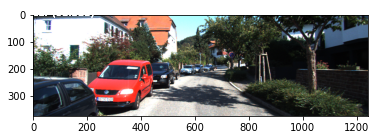

In [23]:
# draw what we found
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)